## Classifying Street Images by Country Using Neural Networks

### Problem Definition
I have taken numerous street photos while studying in Argentina, Taiwan, and Germany. Streets in these countries have distinct visual features, such as architectural styles, signage, and urban layouts. The goal of this project is to classify street images based on their country of origin using a neural network with gradient descent, implemented in scikit-learn.
Given the relatively small dataset (~100 images per country), a challenge arises in training a robust classifier. To address this, data augmentation using Albumentations will be incorporated to artificially expand the dataset and improve model generalization.

### Solution Specification
The project follows these key steps:
- Data Collection & Preparation: Personal street images from Argentina, Taiwan, and Germany are collected and organized into labeled datasets.
- - link to data: https://drive.google.com/drive/folders/1WPohH6G81yjSeyZQxzxkeDVVaDMUN28d?usp=drive_link
- Preprocessing & Data Augmentation: Images are resized, normalized, and augmented using Albumentations to introduce variations in brightness, rotation, and cropping.
- Model Training: A neural network with gradient descent is trained to classify the images.
- Evaluation: Model performance is assessed using cross-validation and a confusion matrix.

In [ ]:
# How to load image from google drive (needs modification)

import os
import cv2
import numpy as np

# Define dataset directory
dataset_path = "/content/drive/MyDrive/ML_Street_Images"

labels = {'argentina': 0, 'taiwan': 1, 'germany': 2}
X, y = [], []

# Iterate through each country folder
for country, label in labels.items():
    folder_path = os.path.join(dataset_path, country)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv2.resize(image, (100, 100))  # Resize for uniformity
            X.append(image.flatten())
            y.append(label)

X = np.array(X)
y = np.array(y)
print("Dataset loaded successfully!")


ModuleNotFoundError: No module named 'cv2'

In [2]:
import jax
import numpy as np
import jax.numpy as jnp

from sklearn import metrics
from sklearn import inspection
from sklearn import datasets
from matplotlib import pyplot as plt

import functools

Dataset loaded!


0    False
1    False
2    False
3    False
4    False
dtype: bool

Original length: 70000
Filtered length: 13966


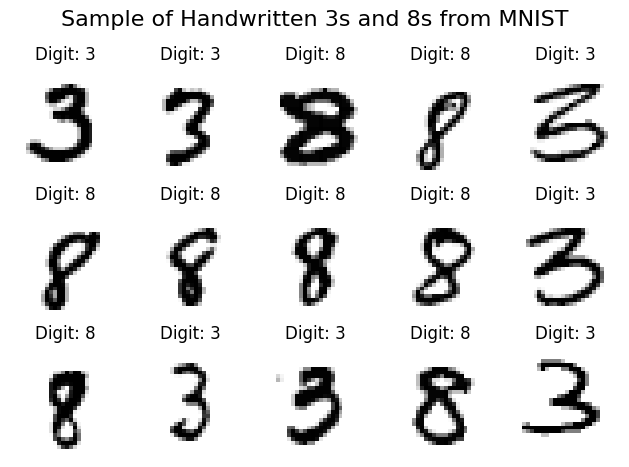

In [10]:
# Core 3.2 Code Practice - Script 1: Load, clean, and visualize the MNIST handwritten digits data set.

'''
This script analyzes the MNIST (Modified National Institute of Standards and Technology) 
dataset, which is a large collection of handwritten digits used to train machine learning
systems. Each image in MNIST is a 28x28 pixel grayscale image of a single handwritten digit.

Understanding Digital Images:
- Each MNIST image is represented as a 28x28 grid of pixels (784 pixels total)
- Each pixel has a grayscale value between 0 (white) and 255 (black)
- When stored in the dataset, each 28x28 image is "flattened" into a 1D array of 784 numbers
- To display the image, we need to "reshape" this 1D array back into a 28x28 grid

This is similar to how a digital scanner works: it converts a physical image into a grid
of numbers representing the darkness or lightness of each tiny square in the grid.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the MNIST dataset into a pandas data frame
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print("Dataset loaded!") #check when the dataset is loaded

# Convert data to pandas DataFrames for easier manipulation
df_X = pd.DataFrame(X) #DataFrame = a 2 dimensional data structure
df_y = pd.Series(y) #Series = a one-dimensional array holding data of any type

# Drop all digits except 3 and 8.

# In real-world applications, we might focus on specific digits to:
# 1. Study commonly confused digits (3 and 8 are often misclassified)
# 2. Reduce computational complexity for initial testing
# 3. Focus on specific classification challenges

mask = df_y.isin(['3', '8'])
display(mask.head()) #a list of True and False

X_filtered = df_X[mask]
y_filtered = df_y[mask]

print("Original length:", len(df_y))
print("Filtered length:", len(y_filtered))

# Create a grid of digit images

grid_size=5
fig, axes = plt.subplots(3, 5)

# Randomly select 15 images
indices = np.random.randint(0, len(X_filtered), 15)

for i, ax in enumerate(axes.flat):
    # Reshape the 1D array (784 pixels) into a 28x28 image
    image = X_filtered.iloc[indices[i]].values.reshape(28, 28)

    # Display the image
    ax.imshow(image, cmap='gray_r')  # 'gray_r' makes digits appear black on white
    ax.axis('off')  # Hide axes
    ax.set_title(f"Digit: {y_filtered.iloc[indices[i]]}")

plt.suptitle("Sample of Handwritten 3s and 8s from MNIST", fontsize=16)
plt.tight_layout()

# Display the visualization
plt.show()

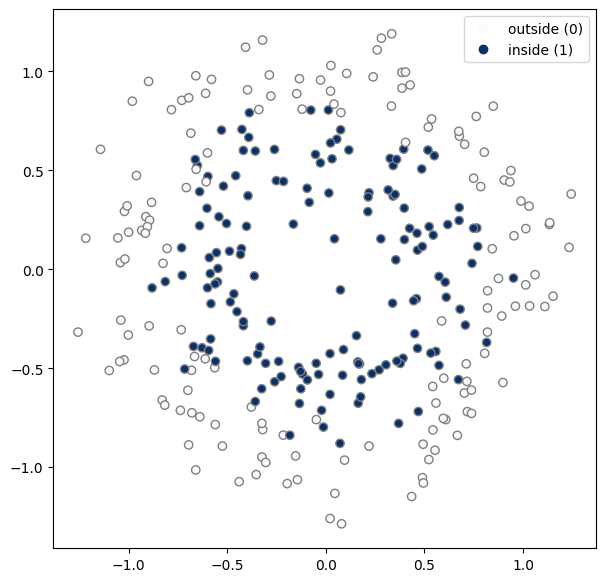

In [3]:
NUM_DATAPOINTS = 300

x_data, y_data = datasets.make_circles(n_samples=NUM_DATAPOINTS, noise=0.15, factor=0.6)

fig, ax = plt.subplots(figsize=(7, 7))
scatter = ax.scatter(x_data[:, 0], x_data[:, 1], c=y_data, edgecolors= "grey", cmap="Blues", vmin=0, vmax=1)
ax.legend(handles=scatter.legend_elements()[0], labels=["outside (0)", "inside (1)"])
plt.show()

In [4]:
# We now define a simple neural network forward pass.
# Note that data is a matrix with axes [batch, features]
def predict_fn(params, X):
    X0 = X
    # remember, * is an elementwise multiply, whereas @ is a matrix multiply.
    X1 = jax.nn.relu(X0 @ params["layer_1"]["W"] + params["layer_1"]["b"])
    X2 = jax.nn.relu(X1 @ params["layer_2"]["W"] + params["layer_2"]["b"])
    # We apply the sigmoid activation to the final layer to get values in 0 to 1.
    X3 = X2 @ params["layer_3"]["W"] + params["layer_3"]["b"]
    return jax.nn.sigmoid(X3)[:, 0]


# We define a loss function. This is binary cross entropy.
# It returns 0 when all predictions are perfect.
def loss_fn(params, X, Y):
    pred_Y = predict_fn(params, X)
    loss = -(Y * jnp.log(pred_Y) + (1 - Y) * jnp.log(1 - pred_Y))
    return jnp.mean(loss)

In [5]:
def plot_decision_surface(params):
    xs = np.linspace(-2, 2, 100)
    ys = np.linspace(-2, 2, 100)
    x_mesh, y_mesh = np.meshgrid(xs, ys)

    vis_x = np.stack((x_mesh, y_mesh), axis=2).reshape(-1, 2)
    vis_y = predict_fn(params, vis_x).reshape(100, 100)

    fig, ax = plt.subplots(figsize=(7, 7))
    contour = ax.contourf(x_mesh, y_mesh, vis_y, levels=np.linspace(0, 1, 33), cmap="Blues")
    cbar = fig.colorbar(contour, ticks=np.linspace(0, 1, 11), ax=ax)
    contour.set_clim(0, 1)
    ax.scatter(x_data[:, 0], x_data[:, 1], c=y_data, edgecolors= "grey", cmap="Blues", vmin=0, vmax=1)

    preds = predict_fn(params, x_data)
    accuracy = metrics.accuracy_score(y_data, preds > 0.5)
    ax.set_title(f"Training set accuracy: {accuracy}") 


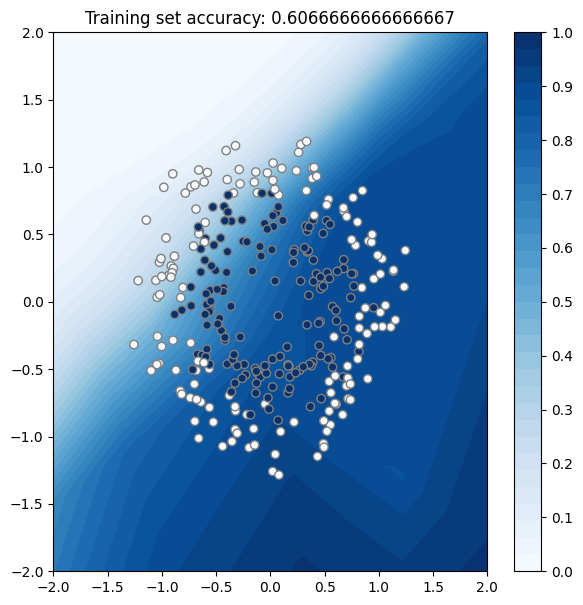

In [6]:
input_dim = 2
hidden_dim = 8
output_dim = 1

params = {
    "layer_1": {
        "W": np.random.normal(size=(input_dim, hidden_dim)),
        "b": np.random.normal(size=(hidden_dim,)),
    },
    "layer_2": {
        "W": np.random.normal(size=(hidden_dim, hidden_dim)),
        "b": np.random.normal(size=(hidden_dim,)),
    },
    "layer_3": {
        "W": np.random.normal(size=(hidden_dim, output_dim)),
        "b": np.random.normal(size=(output_dim,)),
    },
}

plot_decision_surface(params)

In [7]:
# As covered in PCW, jax.grad creates a gradient function.
# But what do we want to take the gradient of again?
# grad_loss = jax.grad(# TODO: INSERT CORRECT FUNCTION HERE )  # UNCOMMENT
grad_loss_fn = jax.grad(loss_fn) # DELETE

In [8]:
step_size = 0.01
total_steps = 3000

for i in range(total_steps):
    # We sample a batch of size 30 from the full dataset, to compute gradients on.
    idxs = np.random.randint(low=0, high=NUM_DATAPOINTS, size=30)
    x_batch, y_batch = x_data[idxs], y_data[idxs]
    # Remember, we compute gradients of the *first* argument, which is params.
    grad = grad_loss_fn(params, x_batch, y_batch)

    # JAX comes with a core concept called PyTrees: any nested Python structure (e.g.
    # lists of lists, dicts of dicts) can be seen as a "tree" with "leaves". In this case,
    # we have a nested dictionary, with "array" leaves. Remember from PCW that `grad` is 
    # a tree with the same structure as `params`. `tree_map` allows us to directly apply
    # a function to each pair of leaves across two trees.

    # In this case, we want to subtract a scaled version of each gradient from its corresponding
    # parameter. Unfortunately this is broken, so the loss goes *up* instead!

    # TODO: fix the following line of code so the loss goes *down*.
    # params = jax.tree_util.tree_map(lambda p, g: p + step_size * g, params, grad)  # UNCOMMENT
    params = jax.tree_util.tree_map(lambda p, g: p - step_size * g, params, grad)  # DELETE


    # We print the accuracy and loss every 100 steps
    if i % 100 == 0:
        preds = predict_fn(params, x_data)
        accuracy = metrics.accuracy_score(y_data, preds > 0.5)
        loss_val = loss_fn(params, x_data, y_data)
        print("Step:", i, "Accuracy:", accuracy, "Loss:", loss_val)

Step: 0 Accuracy: 0.5966666666666667 Loss: 0.7755187
Step: 100 Accuracy: 0.7633333333333333 Loss: 0.5854715
Step: 200 Accuracy: 0.7866666666666666 Loss: 0.5495654
Step: 300 Accuracy: 0.8366666666666667 Loss: 0.5187593
Step: 400 Accuracy: 0.86 Loss: 0.48651022
Step: 500 Accuracy: 0.8566666666666667 Loss: 0.46349162
Step: 600 Accuracy: 0.8566666666666667 Loss: 0.44094646
Step: 700 Accuracy: 0.8666666666666667 Loss: 0.41690424
Step: 800 Accuracy: 0.8633333333333333 Loss: 0.40453774
Step: 900 Accuracy: 0.8733333333333333 Loss: 0.37860653
Step: 1000 Accuracy: 0.8933333333333333 Loss: 0.36459136
Step: 1100 Accuracy: 0.8833333333333333 Loss: 0.34925857
Step: 1200 Accuracy: 0.8833333333333333 Loss: 0.33594406
Step: 1300 Accuracy: 0.8833333333333333 Loss: 0.3252492
Step: 1400 Accuracy: 0.8833333333333333 Loss: 0.31350905
Step: 1500 Accuracy: 0.8833333333333333 Loss: 0.30500618
Step: 1600 Accuracy: 0.8966666666666666 Loss: 0.29686162
Step: 1700 Accuracy: 0.9033333333333333 Loss: 0.28688723
Step:

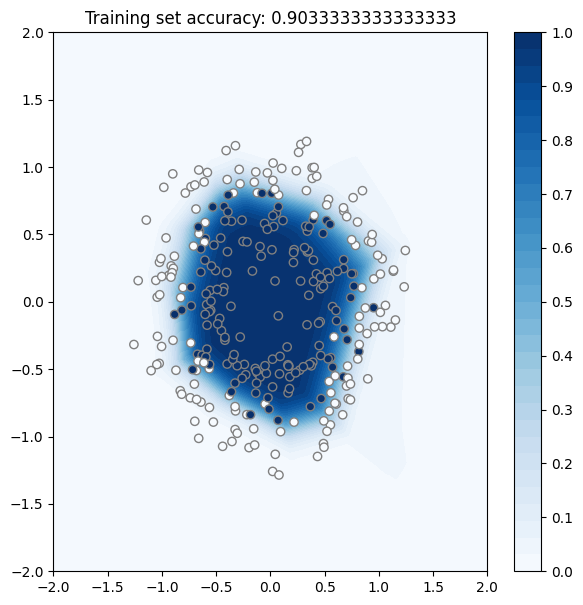

In [9]:
plot_decision_surface(params)